<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/decision_tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arboles de Decisión

In [1]:
# To display plots directly in the notebook:
%matplotlib inline

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import matplotlib
import sklearn
from pathlib import Path
import seaborn as sns

In [3]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

In [4]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

## Lectura de datos

In [5]:
import urllib.request

url = 'https://drive.google.com/uc?id=1c6xl1edw1Y-RE7BMneWVHDaVWDi0KhRy'
urllib.request.urlretrieve(url, DATA/'diabetes.csv')

(PosixPath('/content/data/diabetes.csv'),
 <http.client.HTTPMessage at 0x7d53bc2595b0>)

In [6]:
diabetes = pd.read_csv(DATA/'diabetes.csv')

## Tenemos 8 características y una clase binaria:

In [7]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Nos quedaremos con sólo dos características para poder visualizar mejor

In [8]:
data = diabetes[['glucose', 'bmi', 'diabetes']]

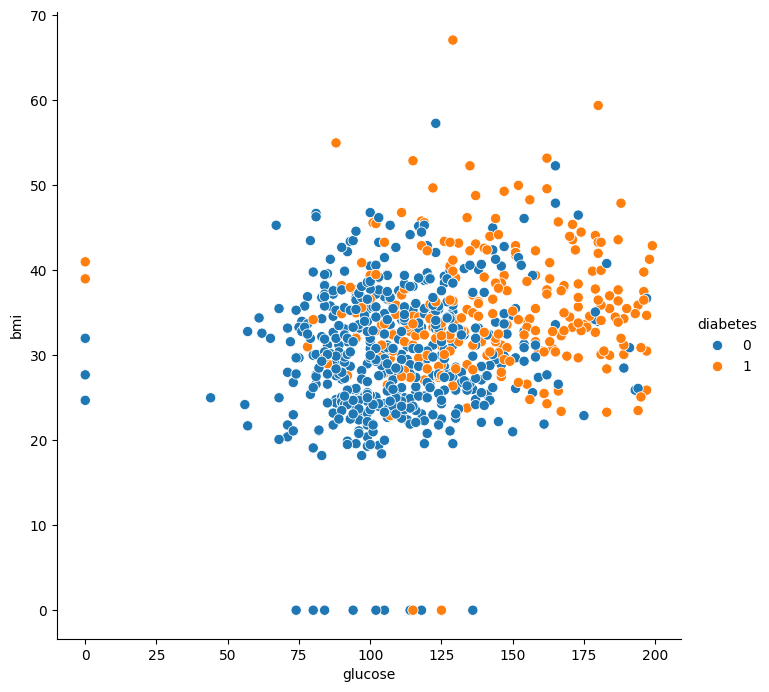

In [9]:
sns.pairplot(x_vars = 'glucose', y_vars = 'bmi', data=data, hue='diabetes',
             height=7,
             plot_kws={"s": 55} # Size of markers
            )
plt.show()

Usaremos scikit-learn para construir las reglas :
Se utiliza el indicador Gini por defecto





In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed) # We'll discuss `max_depth=2` soon

In [12]:
X=data[['glucose', 'bmi']] # The features
y=data['diabetes'] # The labels

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

In [15]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
from graphviz import Source

In [17]:
from IPython.display import display
from IPython.display import SVG

In [18]:
from sklearn.tree import export_graphviz

In [19]:
graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns,
                               class_names=['not diabetes','diabetes'], filled = True, rounded=True))

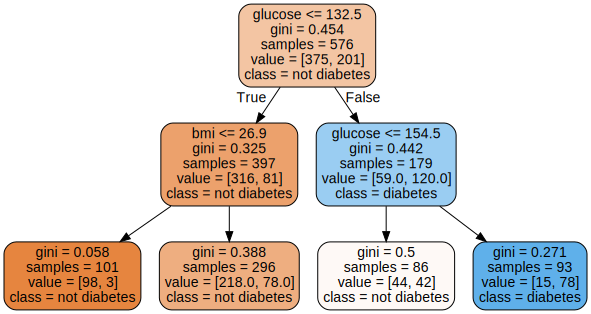

In [20]:
display(SVG(graph.pipe(format='svg')))

## Estimación de las probabilidades de clase




Como comentamos al estudiar la regresión logística, tener modelos que produzcan predicciones *y* probabilidades estimadas es muy útil en la práctica. Queremos modelos que puedan decir cosas como "el modelo predice que tienes diabetes con un 74% de probabilidad"_.

Los árboles de decisión pueden hacer esto.

La idea es simple: cuando una instancia ingresa al árbol de decisión, recorre algún camino hasta terminar en un nodo hoja. La fracción de cada clase asociada a esa hoja es una probabilidad, y podemos interpretarla como la probabilidad de pertenecer a cada clase.

Por ejemplo, mirando de nuevo nuestro árbol de arriba,


Una instancia con un nivel de glucosa de 100 y un BMI de 35 termina en el segundo nodo de la hoja. Hay 218 instancias de no diabetes y 78 instancias de entrenamiento de diabetes en ese nodo, y el modelo dará las probabilidades.

$$218/296 = 0.736, \qquad 78/296 = 0.264$$

para no diabetes y diabetes.

In [21]:
test_sample = [100, 35]

Debemos usar `predict_proba` para obtener las probabilidades:

In [22]:
tree_clf.predict_proba([test_sample,])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.73648649, 0.26351351]])

Esto parece bueno, pero se vuelve menos agradable una vez que te das cuenta de que este método produciría exactamente las mismas probabilidades para una instancia cuya glucosa es 20 y el BMI es 10...

In [23]:
tree_clf.predict_proba([[20, 28],])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.73648649, 0.26351351]])